# Artificial Intelligence for Robotics 05

## General Information:
Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.

If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.

When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via Kernel -> Restart & Run All).

Code cells where you are supposed to give your answer often include the line `raise NotImplementedError`. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.

## Submission:
Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are **due on Monday at 20:00**.

## Group Work:
Please enter your UID (your username here) and those of your group partners into the next cell. We apply plagiarism checking, so do not submit others solutions! If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.

## Questions about the Assignment:
If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions!

### Please add the usernames of all your team members in the manner member1, member2 in next cell (example given below)

member1 = 'example'

member2 = 'example2'

#### If you are not working in a group, then please add member2 as none2s

In [22]:
# YOUR CODE HERE
member1 = 'ahoosh2s'
member2 = 'anuhel2s'
#raise NotImplementedError()

In [23]:
# Execute this cell to make sure you correctly filled in the usernames of the team members

def group_name_test():
    for member_id in [member1, member2]:
        assert isinstance(member_id, str), "Please give your member id as a string."
        assert len(member_id) > 0, "You need to fill in the member id for both members"
        assert member_id.endswith("2s"), "The member id should end with 2s (Your JupyterHub username)"

group_name_test() 
print("All tests passed!")

All tests passed!


# Task 1

**[90 Point(s)]**

# Traveling Salesman Problem

The **traveling salesman problem** asks the following question:
> Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

It is an [NP-hard](https://en.wikipedia.org/wiki/NP-hardness) problem in combinatorial optimization. Hence, in this assignment we will try to find the most optimal solutions using *local search* techniques.

For the course of this assignment, we will consider a cities dataset, which you can find under `Local_Search_files/data/cities.csv`, that contains geo locations of different cities and there respective names in the format `name, lng, lat`, where both `lng` and `lat` are floats and `name` is a string. 

The TSP problem is modeled as a complete undirected graph, which means that each city has a connection to every other city and each connection is weighted by the distance between the two cities.
<img src="Local_Search_files/img/complete_graph_tsp.png" alt="Complete Example Graph" width="300"/>

## Task 1.1

**[10 Point(s)]**

### Loading the Data

First, we need to load the data from the file into a list of tuples to work with it. Since the data in a typical `.csv` format, we can use pythons csv module to parse it.
```
[
  ('Shanghai', 121.47, 31.23),
  ('Bombay', 72.82, 18.96),
  ('Karachi', 67.01, 24.86)
]
```

In [24]:
import csv

file_path = 'Local_Search_files/data/cities.csv'
coordinates = []
with open ('Local_Search_files/data/cities.csv', mode = 'r') as csv_file:
    Read = csv.reader(csv_file)
    next(Read)
    for line in Read:
        coordinates.append((line[0], float(line[1]), float(line[2])))
print(coordinates)
# YOUR CODE HERE
#raise NotImplementedError()

[('Shanghai', 121.47, 31.23), ('Bombay', 72.82, 18.96), ('Karachi', 67.01, 24.86), ('Buenos Aires', -58.37, -34.61), ('Delhi', 77.21, 28.67), ('Istanbul', 29.0, 41.1), ('Manila', 120.97, 14.62), ('Sao Paulo', -46.63, -23.53), ('Moscow', 37.62, 55.75), ('Dhaka', 90.39, 23.7), ('Soul', 126.99, 37.56), ('Lagos', 3.35, 6.5), ('Kinshasa', 15.32, -4.31), ('Tokyo', 139.77, 35.67), ('Mexico City', -99.14, 19.43), ('Jakarta', 106.83, -6.18), ('New York', -73.94, 40.67), ('Tehran', 51.43, 35.67), ('Cairo', 31.25, 30.06), ('Lima', -77.05, -12.07), ('Peking', 116.4, 39.93), ('London', -0.1, 51.52), ('Bogota', -74.09, 4.63), ('Lahore', 74.35, 31.56), ('Rio de Janeiro', -43.2, -22.91), ('Bangkok', 100.5, 13.73), ('Bagdad', 44.44, 33.33), ('Bangalore', 77.56, 12.97), ('Santiago', -70.64, -33.46), ('Calcutta', 88.36, 22.57), ('Singapore', 103.85, 1.3), ('Toronto', -79.38, 43.65), ('Rangoon', 96.15, 16.79), ('Ibadan', 3.93, 7.38), ('Riyadh', 46.77, 24.65), ('Madras', 80.27, 13.09), ('Chongqing', 106.58

## Task 1.2

**[10 Point(s)]**

## Applying Hill Climbing

### Generating Successors [10 Points]

As a first important part of the *hill climbing* algorithm you need to implement a mechanism to generate successors of a current sequence. Since generating all successors of one state, given the rather large state space of all possible permutations of all cities, would exceed the feasible computation time of this assignment, we will limit ourselves to 100 **random** successors instead.

Each successor is generated by swapping any **two** cities randomly. However, the first and last city should remain unchanged since the traveller starts and ends in the same city.

In [25]:
import random
from typing import List

def get_successors(curr_seq: List[int], n=100) -> List[List[int]]:
    """ Function to generate a list of random successor sequences.
    :param curr_seq: The current sequence of cities given by a list of their respective index in the
    coordinates list.
    :param n: Number of successors to generate; Default: 100
    :returns: A list of n new sequences generated by permutation of the current sequence.
    """
    new_seqs = []
    length = len(curr_seq)
    
    # Ensure there are at least three cities (first and last fixed, and at least one to swap)
    if length <= 2:
        raise ValueError ("There must be at least two cities!!")
    
    for i in range(n):
        # Create a copy of the current sequence to modify
        successor = curr_seq[:]
        x, y = random.sample (range(1, length -1), 2)
        # Swap the selected indices
        successor [x], successor[y] = successor[y], successor[x]
        # Add the new sequence to the list of successors
        new_seqs.append(successor)

# YOUR CODE HERE
#raise NotImplementedError()
    return new_seqs

## Task 1.3

**[5 Point(s)]**

### Distance Matrix [5 Points]

As a measure of distance between two cities, we will use the euclidean distance, which is defined as follows in a two dimensional space:
$$d(p,q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}$$
In order to efficiently inference distances between two cities, the distances between every two cities is calculated once and stored in a distance matrix $D$ using `get_distance_matrix`.

The number of rows and columns of the distance matrix are equal to the number of the cities and each entry $D_{i,j}$ represents the distance between cities $i$ and $j$. Note that the diagonal elements $D_{i,i}$ will be zero because the distance between a city and itself is zero.

To compute the distance of a sequence of cities we will use the `get_distance` function. This function simply accesses the distance matrix and sums up the distances to arrive at the cost of the input sequence.

#### Example
If there are 3 cities, then the distance matrix is a $3x3$ matrix, with each city representing a row
and a column. Each element of the matrix represents the *euclidean distance* between the coordinates of the cities. Thus, the diagonal elements will be zero.

In [26]:
from typing import List, Tuple, Dict
from math import sqrt

def get_distance_matrix(coordinates: List[Tuple[str, float, float]]) -> Dict[int, Dict[int, float]]:
    """ Function to generate a distance matrix.
    :param coordinates: List of all cities, their names and coordinates
    :returns: Two dimensional dictionary containing the distance from each city to each city.
    """
    distances = {}
    for i in range(len(coordinates)):
        # Initialize the inner dictionary for city i
        distances[i]={}
        for j in range (len(coordinates)):
            if i == j:
                # Distance from a city to itself is 0
                distances[i][j] = 0.0
            else:
                # Extract coordinates for cities i and j
                x1, y1 = coordinates[i][1], coordinates[i][2]
                x2, y2 = coordinates[j][1], coordinates[j][2]
                # Compute the Euclidean distance
                distances[i][j] = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distances
    # YOUR CODE HERE
    #raise NotImplementedError()

def get_distance(distance_matrix: Dict[int, Dict[int, float]], seq: List[int]) -> float:
    """ Function to get the distance while travelling along a particular sequence of cities.
    :param distance_matrix: Two dimensional dictionary containing the distance from each city to each city.
    :param seq: The sequence of cities given by a list of their respective index in the coordinates list
    :returns: The accumulated cost of the given sequence.
    """
    distance = 0.0
    #Ensures there are at least two cities to form a circle (Just in case!)
    if len(seq) < 2:
        raise ValueError ("There must at least two cities")
    for i in range (len(seq) - 1):
        if seq[i] not in distance_matrix:
            raise KeyError(f"{seq[i]} is not found in distance_matrix")
        else:
            distance += distance_matrix[seq[i]][seq[i+1]]
    #Adds to the distance the cost from the last city back to the first to complete the circular route
    distance += distance_matrix[seq[-1]][seq[0]]
    
    return distance 
# YOUR CODE HERE
#raise NotImplementedError()

## Task 1.4

**[20 Point(s)]**

### Simple and Steepest Descent Hill Climbing [20 Points]

Hill climbing is a *mathematical optimization technique* which belongs to the family of *local search*. It is an iterative algorithm that starts with an arbitrary solution to a problem, then attempts to find a better solution by making an incremental change to the solution. If the change produces a better solution, another incremental change is made to the new solution, and so on until no further improvements can be found.

There are two variants of the hill climbing algorithm, that we will consider in this exercise:

#### Simple Hill Climbing
Simple hill climbing is the simplest way to implement a hill climbing algorithm. It selects the first successor, which has better a better cost than the current state.

#### Steepest Descent
Given a state, all possible sucessors are being evaluated and the one with the highest/lowest objective function is chosen as the new state.

What we are actually implementing is a meta algorithm that builds on top of the hill climbing algorithm: **Random-restart hill climbing**. It iteratively does hill-climbing, each time with a random initial condition $x_{0}$. The best $x_{m}$ is kept: if a new run of hill climbing produces a better $x_{m}$ than the stored state, it replaces the stored state.

You can find additional information on [Wikipedia](https://en.wikipedia.org/wiki/Hill_climbing), or in the Russel and Norvig book.

For this exercise, we will consider the number of restarts $r=5$ and $n=2000$ iterations per hill climb.

In [27]:
from typing import List, Tuple
import random 
def hill_climb(coordinates: List[Tuple[str, float, float]],
               simple: bool = False, n: int = 2000, r: int = 5) -> Tuple[float, List[int], List[float]]:
    """ Function to implement both simple and steepest descent hill climbing algorithm for the travelling
    salesman problem.
    :param coordinates: List of all cities, their names and coordinates
    :param simple: If True: run simple hill climb; Else steepest descent
    :param n: Number of iterations per hill-climb
    :param r: Number of restarts to perform
    :returns: The best cost found overall by the algorithm, the respective best sequence of cities and the
    history of the accumulated cost of each best sequence over all iterations.
    """
    # Assuming get_distance_matrix and get_distance are defined elsewhere and imported
    distance_matrix = get_distance_matrix(coordinates)
    
    optimum_cost = float('inf')
    optimum_seq = []
    history = []

    for _ in range(r):
        # Initiating a random seqence with the start and end cities being removed
        original_sequence = list(range(len(coordinates)))
        random.shuffle(original_sequence[1:-1])  # Shuffle only the cities in the middle
        current_cost = get_distance(distance_matrix, original_sequence)

        for _ in range(n):
            if simple:
                # One successor is chosen for the simple hill climbing
                successors = get_successors(original_sequence)
                successor = successors[0]
                successor_cost = get_distance(distance_matrix, successor)
                
                if successor_cost < current_cost:
                    original_sequence = successor
                    current_cost = successor_cost
            else:
                # Multiple successors are picked, out of which the best depending on the cost calculated
                successors = get_successors(original_sequence, n=100)
                optimum_local_cost = current_cost
                optimum_local_sequence = original_sequence

                for sequence in successors:
                    cost = get_distance(distance_matrix, sequence)
                    if cost < optimum_local_cost:
                        optimum_local_cost = cost
                        optimum_local_sequence = sequence
                
                original_sequence = optimum_local_sequence
                current_cost = optimum_local_cost

            history.append(current_cost)

        # After iterations are done, optimum cost and sequence should be updated
        if current_cost < optimum_cost:
            optimum_cost = current_cost
            optimum_seq = original_sequence

    return optimum_cost, optimum_seq, history   
                
    # YOUR CODE HERE
    #raise NotImplementedError()
# The fuction is called and reuslts are printed
optimum_cost, optimum_seq, history = hill_climb(coordinates, True)
cities = set()
for i in optimum_seq:
    cities.add(coordinates[i][0])
print ("The optimum cost is: {:.3f}\n".format(optimum_cost))
print ("The optimum sequence of cities is: {}\n".format(" -> ".join(cities)))
print ("The history of costs is:{}".format(history))
# YOUR CODE HERE
#raise NotImplementedError()
# best_cost, best_seq, history = hill_climb(coordinates, True)

The optimum cost is: 39331.498

The optimum sequence of cities is: Bhatpara -> Surakarta -> Akure -> Essen -> Irkutsk -> Ibadan -> Antalya -> Tijuana -> Wuxi -> Peking -> Anyang -> Fort Worth -> Calcutta -> Queretaro -> Baoding -> Tiruchchirappalli -> al-'Ayn -> Naples -> Gulbarga -> Qingdao -> Ouagadougou -> Rosario -> Milan -> Rabat -> Wuhu -> Medan -> Xiamen -> Kaifeng -> Guiyang -> Pimpri -> Culiacan -> Suez -> Tucuman -> Hamhung -> Surat -> Kano -> Jilin -> Yekaterinburg -> Ampang Jaya -> Zhangjiakou -> Kunming -> Tashkent -> Tegucigalpa -> Curitiba -> Bhavnagar -> Moradabad -> Qiqihar -> Xianggangdao -> Mbuji-Mayi -> Managua -> al-Madinah -> Recife -> Wroc?aw -> Marseille -> 'Amman -> Glasgow -> Zhunmen -> Birmingham -> Okayama -> Toluca -> Mixco -> Morelia -> Xigong -> Allahabad -> Abuja -> Koyampattur -> Istanbul -> Sydney -> Freetown -> Ghaziabad -> Guntur -> Ilorin -> Khulna -> Asuncion -> Gorakhpur -> Tangier -> Nizhniy Novgorod -> Changsha -> Barquisimeto -> Accra -> Changd

## Task 1.5

**[10 Point(s)]**

### Evaluation of Hill Climbing on the TSP [10 Points]

First apply both the simple and steepest descent version of the algorithm to the TSP on the cities dataset and save your results in the respective variables provided below.

Then, in order to visualize the workings and convergence behaviour of the algorithm we will plot the number of iterations over the cost of the currently best sequence. Note, that their should be **one continuous plot** for all 10000 iterations of a 5 restart 2000 iteration run.

Your plot shoud look similar to this
![Hill Climb Example](Local_Search_files/img/hill_climb_example.png)

**Remember that your plots should always have a grid, axis labels, a legend and a title!**

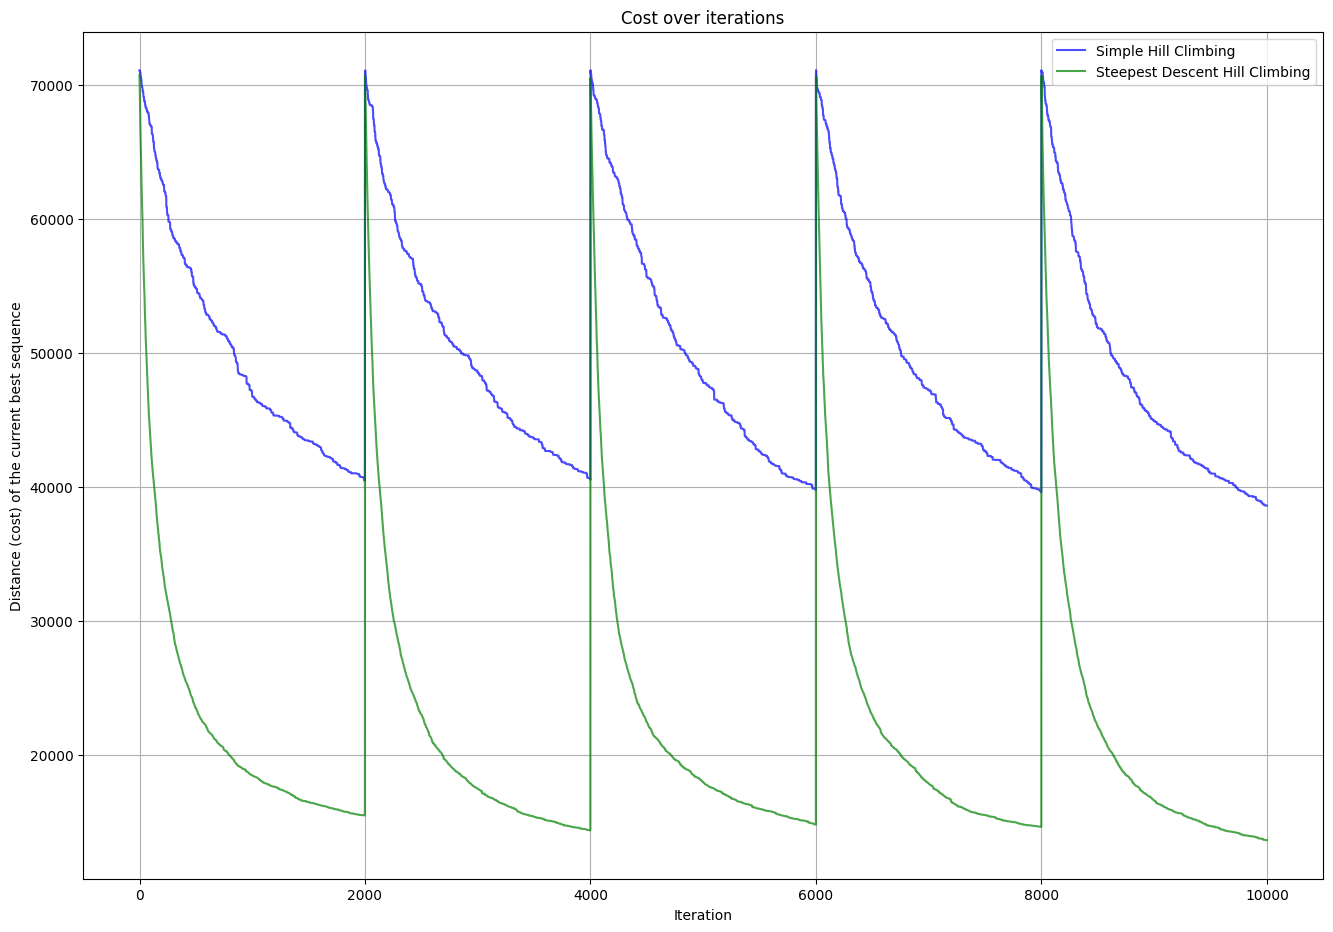

In [28]:
from matplotlib import pyplot as plt

cost_simple = 0.0
cost_sd = 0.0
best_simple = []
best_sd = []
history_simple = []
history_sd = []

cost_simple, best_simple, history_simple = hill_climb(coordinates, simple=True)

cost_sd, best_sd, history_sd = hill_climb(coordinates, simple=False)

#Putting iterations on the X-axis
iterations_simple = range(len(history_simple))
iterations_sd = range(len(history_sd))

# Create a canvas for plotting
plt.figure(figsize=(16, 11))

# Adding X and Y-axis, together with title and legend with a grid added to it
plt.xlabel("Iteration")
plt.ylabel("Distance (cost) of the current best sequence")
plt.title("Cost over iterations")

plt.grid()

# Simple Hill Climbing plot
plt.plot(iterations_simple, history_simple, label="Simple Hill Climbing", color="blue", alpha=0.7)

# Steepest Descent Hill Climbing plot
plt.plot(iterations_sd, history_sd, label="Steepest Descent Hill Climbing", color="green", alpha=0.7)

plt.legend(loc='best')
# Plot is drawn
plt.show()
# YOUR CODE HERE
#raise NotImplementedError()

## Task 1.6

**[20 Point(s)]**

### Simulated Anealing [20 Points]

Hill climbing will not necessarily find the global maximum, but may instead converge to a local maximum/minimum. This problem does not occur if the heuristic is convex. However, as many functions are not convex hill climbing may often fail to reach a global maximum/minimum. Other local search algorithms try to overcome this problem such as *stochastic hill climbing*, *random walks* and *simulated annealing*.

**Simulated annealing** is a probabilistic technique for approximating the global optimum of a given function. Specifically, it is a metaheuristic to approximate global optimization in a large search space for an optimization problem. It is often used when the search space is discrete, which is the case for our problem at hand.

Implement the simulated annealing algorithm. You can refer to [Wikipedia](https://en.wikipedia.org/wiki/Simulated_annealing#Overview) for a great overview of the workings of the algorithm.

In [30]:
from typing import Dict, Tuple, List
import math, random

def simulated_annealing(coordinates: List[Tuple[str, float, float]],
                        step_size: int, temp: float, n=2000) -> Tuple[float, List[int],
                                                                      List[Tuple[float, float]]]:
    """ Function that implements the simulated annealing algorithm.
    :param coordinates: List of all cities, their names and coordinates
    :param n: Number of iterations
    :param step_size: step size, relative to the bounds of the search space
    :param temp: The initial temperature
    :returns: The best cost found overall by the algorithm, the respective best sequence of cities and the
    history of the accumulated cost of each sequence and the temperature.
    """
    # Distance matrix
    distance_matrix = get_distance_matrix(coordinates)
    
    # Initialize the starting sequence and its cost
    current_sequence = list(range(len(coordinates)))
    random.shuffle(current_sequence[1:-1])  # Shuffle except start and end cities
    current_cost = get_distance(distance_matrix, current_sequence)
    
    # Set initial best values
    best_sequence = current_sequence[:]
    best_cost = current_cost
    history = [(temp, current_cost)]
    
    for _ in range(n):
        for _ in range(step_size):
            # Generate successors
            successors = get_successors(current_sequence)
            new_sequence = successors[0]  # Select the first successor
            new_cost = get_distance(distance_matrix, new_sequence)
            
            # Calculate delta_cost whihc is the difference between new_cost and current_cost
            delta_cost = new_cost - current_cost
            
            # if delta_cost is smaller than zero new_sequence and new_cost should be replaced
            if delta_cost < 0:
                current_sequence = new_sequence
                current_cost = new_cost
            else:
                # Probability check
                acceptance_probability = math.exp(-delta_cost / temp)
                if random.random() < acceptance_probability:
                    current_sequence = new_sequence
                    current_cost = new_cost
            
            # The best solution should always be updated
            if current_cost < best_cost:
                best_cost = current_cost
                best_sequence = current_sequence[:]
        
        # Reduction of the temperature in each iteration
        temp *= 0.99
        history.append((temp, best_cost))  # Record temperature and cost
        
        # If the tempeatrue is low enough then it breaks
        if temp < 1e-3:
            break
    
    return best_cost, best_sequence, history

#best_cost, best_sequence, history = simulated_annealing(coordinates, step_size = 5, temp = 100.0, n=2000)
#cities = []
#for i in best_sequence:
#    cities.append(coordinates[i][0])
#print ("The best cost is: {:.3f}".format(best_cost))
#print ("The best sequence of cities is: {}".format(" -> ".join(cities)))
#print ("The history of the accumulated cost of each sequence is:{}".format(history))
# YOUR CODE HERE
#raise NotImplementedError()

## Task 1.7

**[10 Point(s)]**

### Applying Simulated Annealing to TSP [10 Points]

Now apply the simulated annealing algorithm that you have implemented above to the traveling salesman problem on the cities dataset and record your results in the respective variables provided below.

In [31]:
cost_annealing = 0.0
best_annealing = []
history_annealing = []
cost_annealing, best_annealing, history_annealing = simulated_annealing(coordinates, step_size = 5, temp = 100.0, n=2000)
cities = []
for i in best_annealing:
    cities.append(coordinates[i][0])
print ("The best cost is: {:.3f}".format(cost_annealing))
print ("The best sequence of cities is: {}".format(" -> ".join(cities)))
print ("The history of the accumulated cost of each sequence is:{}".format(history_annealing))
# YOUR CODE HERE
#raise NotImplementedError()

The best cost is: 28786.487
The best sequence of cities is: Shanghai -> Yantai -> Benxi -> Shiliguri -> Kota Kinabalu -> Taegu -> Kumamoto -> Yuanlong -> Nanchang -> Taizhou -> Soul -> Delhi -> Jalandhar -> Damascus -> Krasnodar -> Rajshahi -> Wuhan -> Shatian -> Zhunmen -> Hamamatsu -> Nagoya -> Dasmarinas -> Ampang Jaya -> Ludhiana -> Srinagar -> Bareli -> Tabuk -> Addis Abeba -> Santo Domingo -> Jacksonville -> Chihuahua -> Toronto -> Cucuta -> Adana -> Haora -> Bhatpara -> Guilin -> Shashi -> Xian -> Chongqing -> Hai Phong -> Foshan -> Fuzhou -> Shijiazhuang -> Rongcheng -> Inchon -> Sagamihara -> Singapore -> Anshan -> Changwon -> Dandong -> Xinxiang -> Dhaka -> Anyang -> Novokuznetsk -> Tbilisi -> Riga -> Asuncion -> Lima -> Sorocaba -> Cochabamba -> Maracay -> Port Harcourt -> Zaragoza -> Hyderabad -> Nashik -> Irbil -> Bagdad -> Asmara -> Jiddah -> Bouake -> Prague -> Bremen -> Malaga -> Philadelphia -> Santiago -> Manaus -> Karaj -> Berlin -> Marseille -> Xingtai -> Qinhuangda

## Task 1.8

**[5 Point(s)]**

### Visualize the Results [5 Points]

Visualize the workings of the simulated annealing algorithm by plotting the cost, together with the temperature, over the number of iterations.

**Remember that your plots should always have a grid, axis labels, a legend and a title!**

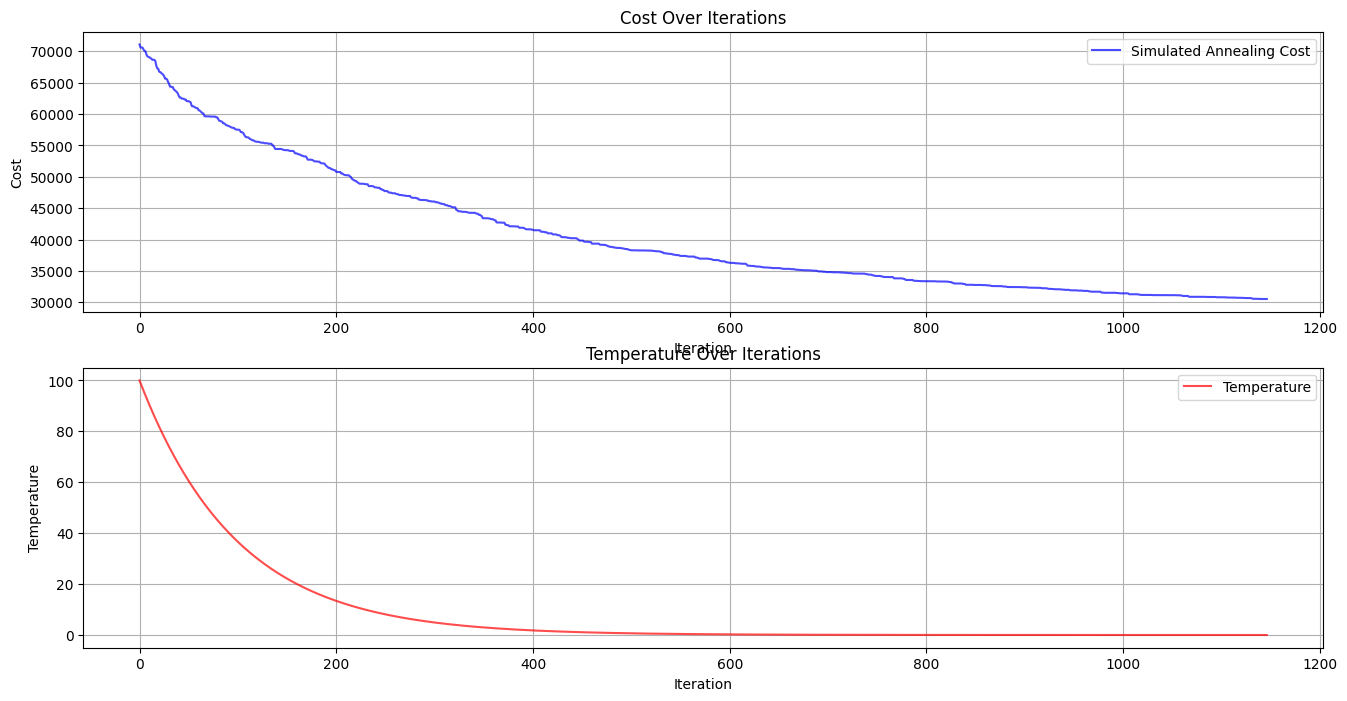

In [32]:
from matplotlib import pyplot as plt

cost_annealing = 0.0
best_annealing = []
history_annealing = []
temperature_history = []
# Simulated annealing outputs
cost_annealing, best_annealing, history_annealing = simulated_annealing(
    coordinates, step_size=5, temp=100.0, n=2000
)

# Getting temperature and costs from history_annealing
_, costs = zip(*history_annealing)

for i in range(len(history_annealing)):
    temp = 100.0 * (0.99 ** i)  # Example: multiply by 0.99 per iteration
    temperature_history.append(temp)
# Iterations
iterations_annealing = range(len(history_annealing))

# Create a canvas for the plot
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)  # First subplot for cost
plt.plot(iterations_annealing, costs, label="Simulated Annealing Cost", color="blue", alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Over Iterations")
plt.grid()
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # Second subplot for temperature
plt.plot(iterations_annealing, temperature_history, label="Temperature", color="red", alpha=0.7)
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.title("Temperature Over Iterations")
plt.grid()
plt.legend(loc='best')

# Show the plot
plt.show()
# YOUR CODE HERE
#raise NotImplementedError()